In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# BMI Calculator 

200 entries for height and weight

and calculate the BMI

and then categories as Slim, Normal, Fat


In [2]:
np.random.seed(50)
height = np.random.randint(140,200,200)
weight = np.random.randint(40,120,200)
bmi = weight/((height/100)**2)

def category(bmi):
    bmi=float(bmi)
    if bmi <= 19 and bmi > 1:
        return "under weight"
    elif bmi<=25 and bmi > 19:
        return "normal"
    else:
        return "over weight"

category = np.array([category(b) for b in bmi] )

BMI=pd.DataFrame({"Height":height,"Weight":weight,"BMI":bmi,"Category":category})
BMI

,Height,Weight,BMI,Category
0,188,104,29.425079,over weight
1,172,118,39.886425,over weight
2,151,92,40.349107,over weight
3,185,66,19.284149,normal
4,173,85,28.400548,over weight
...,...,...,...,...
195,154,87,36.684095,over weight
196,196,99,25.770512,over weight
197,142,70,34.715334,over weight
198,180,103,31.790123,over weight


In [3]:
L_C = LabelEncoder()
BMI["Category"] = L_C.fit_transform(BMI["Category"])
BMI

,Height,Weight,BMI,Category
0,188,104,29.425079,1
1,172,118,39.886425,1
2,151,92,40.349107,1
3,185,66,19.284149,0
4,173,85,28.400548,1
...,...,...,...,...
195,154,87,36.684095,1
196,196,99,25.770512,1
197,142,70,34.715334,1
198,180,103,31.790123,1


In [4]:
X= BMI[["Height","Weight"]]
Y= BMI["Category"]

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=50)

In [6]:
print(X_train,X_test,Y_train,Y_test)

     Height  Weight
114     190      64
187     166      86
76      185     118
122     198      91
142     141      40
..      ...     ...
132     157      50
33      140     102
109     184      79
139     199      94
176     149      95

[140 rows x 2 columns]      Height  Weight
112     178      67
165     162      48
12      145      59
73      198     116
144     148      40
20      175      67
199     162      98
8       177     118
39      170     112
88      172     103
81      141      90
197     142      70
69      147      43
160     170     109
25      146      91
99      193      54
151     196      54
23      166     117
138     167     114
159     151      67
89      159     119
82      149      83
24      166      61
174     197      56
137     167      65
83      169      72
107     180      45
34      199      52
97      176      94
167     177      83
123     192      77
157     190      90
75      140      61
152     155      44
117     168      49
149     143     

In [7]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=4)

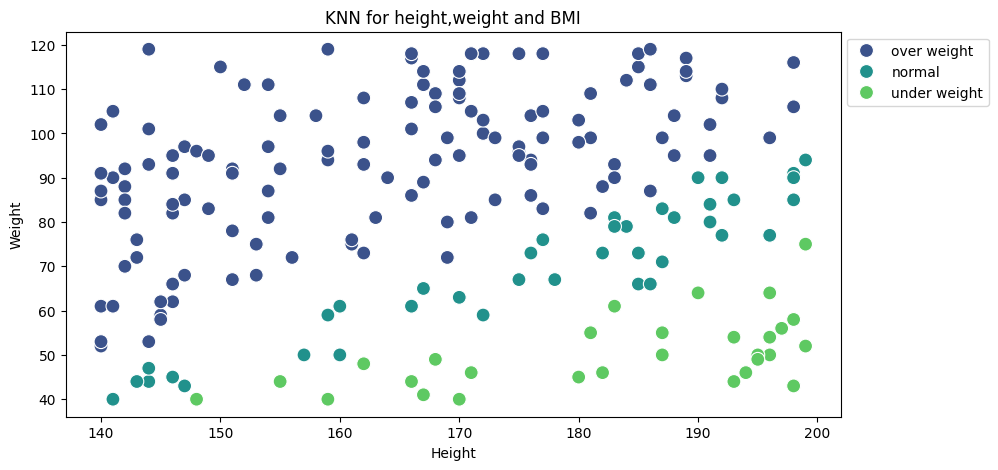

In [8]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=X,x=height,y=weight,hue=L_C.inverse_transform(Y),palette = "viridis", s=100)
plt.title("KNN for height,weight and BMI")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(loc="upper right",bbox_to_anchor=(1,0.2,0.2,0.8))
plt.show()

Enter your Height in cm:  170
Enter your Weight in kg:  40


Distance = [[ 3.16227766  5.65685425  6.08276253 11.        ]]


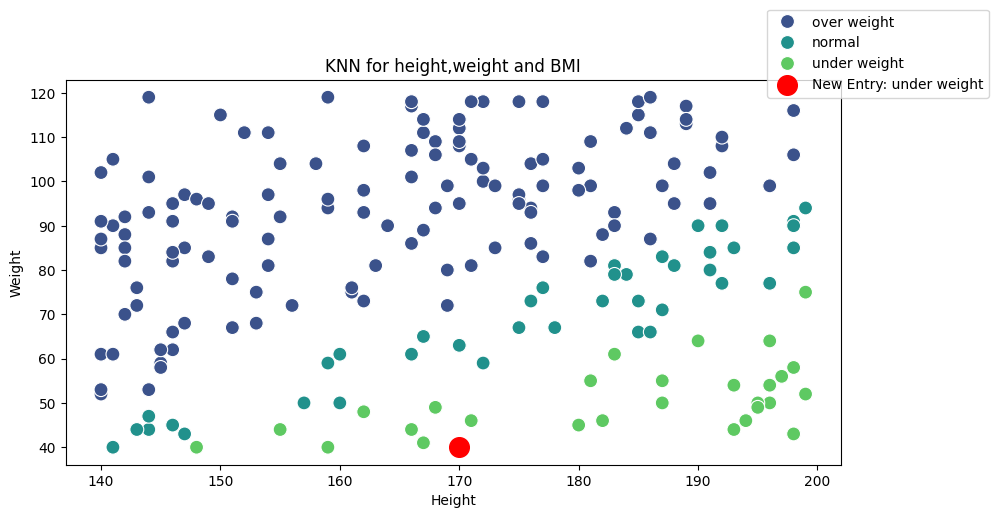

Height = 170.0 | Weight = 40.0 | Predicted Category = under weight 


In [10]:
def predictBMI(data,model,L_C):
    p=model.predict(data)
    P_C=L_C.inverse_transform(p)[0]
    return P_C


user_H=float(input("Enter your Height in cm: "))
user_W=float(input("Enter your Weight in kg: "))

input_data=np.array([[user_H,user_W]])
predicted_Category = predictBMI(input_data,model,L_C)

D,I=model.kneighbors(input_data,n_neighbors=4)

print(f"Distance = {D}")

plt.figure(figsize=(10,5))
#training data plot
sns.scatterplot(data=X,x=height,y=weight,hue=L_C.inverse_transform(Y),palette = "viridis", s=100)

#input data plot
plt.scatter(input_data[0,0],input_data[0,1],color='red',s=200,label=f'New Entry: {predicted_Category}')

plt.title("KNN for height,weight and BMI")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(loc="upper right",bbox_to_anchor=(1,0.4,0.2,0.8))
plt.show()
print(f"Height = {user_H} | Weight = {user_W} | Predicted Category = {predicted_Category} ")

# Wine Quality analysis

you have two featurs as citrus acid content and Density of wine

you have to calulate the quality by using the formula



citrus acid content can be in range (1 to 5)

density of wine can be in range (9930 to 9970)

quality =15000 × (var1/var2)
​
plot the KNN graph and predict the qullity of wine

quality range   wine status

5-6.5         normal

6.5-8         good

8 - 10        best